In [14]:
from matplotlib import pyplot as plt
from numpy import genfromtxt
import numpy as np
file = 'qlearningResults.csv'
my_data = genfromtxt(file, delimiter=',')
y = [x[0] for x in my_data]


In [8]:
print(y)


[-7.729999990463126, -5.089999990463183, -0.3899999904632574, -9.999999999776314, -9.999999999776314, -2.329999990463241, -1.5999999904632562, -6.869999990463144, -0.8699999904632578, -3.1999999904632226, -0.10999999046325715, -3.659999990463213, -4.2599999904632, -4.509999990463195, -1.6399999904632554, -5.979999990463163, -1.3699999904632583, -5.149999990463181, -5.899999990463165, -3.609999990463214, -1.2899999904632582, -0.8699999904632578, -7.599999990463129, -1.4899999904632584, -2.35999999046324, -1.3499999904632582, -1.8999999904632499, -1.569999990463257, -1.089999990463258, -9.999999999776314, -4.149999990463202, -3.9899999904632066, -8.119999990463118, -5.259999990463179, -4.5199999904631945, -1.6499999904632552, -9.999999999776314, -2.3899999904632394, -0.22999999046325725, -2.87999999046323, -1.6299999904632556, -8.329999990463115, -1.8699999904632505, -0.9899999904632579, -9.999999999776314, -4.589999990463193, -4.219999990463202, -1.4199999904632583, -9.999999999776314, 

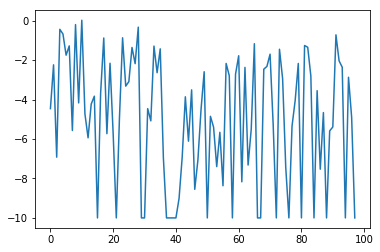

In [6]:
plt.plot(y) # Plot shown when learning with epsilon decay at 0.999

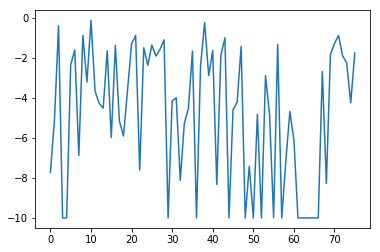

In [9]:
plt.plot(y) # Plot shown with epsilon decay of 0.99

-5.911666660234244


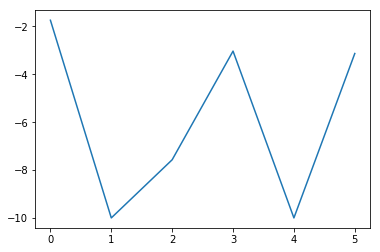

In [15]:
plt.plot(y) # Run when epsilon set to 0 and loaded from q table built from previous 2 runs
print(np.mean(y))